In [2]:
# (2.1) Basic Terminology

In [3]:
## Iris Flower dataset

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [5]:
### Read the Dataset


In [6]:
iris_dataset = pd.read_csv("Iris.csv")

print(iris_dataset.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [7]:
### How many data-points and features?

In [8]:
data_points = iris_dataset.shape[0]
data_features = iris_dataset.shape[1]

print(f'Number of Data points : {data_points} & Number of Features : {data_features}')

Number of Data points : 150 & Number of Features : 5


In [9]:
### What are the column names in the dataset?

In [10]:
iris_dataset.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [11]:
### How many data points for each class are present?
### How many flowers for each species are present?

###Note: balanced-dataset vs imbalanced datasets
###Iris is a balanced dataset as the number of data points for every class is 50.

In [12]:
species_count = iris_dataset['species'].value_counts()
print(species_count)

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


In [13]:
# (2.2) 2-D Scatter Plot

In [14]:
###2-D scatter plot:
###ALWAYS understand the axis: labels and scale.



###cannot make much sense out it.
###What if we color the points by thier class-label/flower-type.

In [15]:
iris_dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


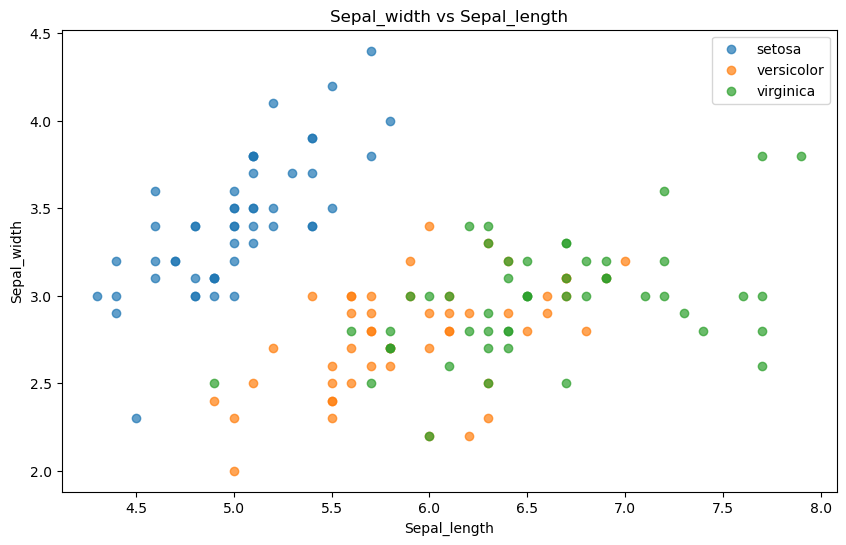

In [16]:
x_feature = 'sepal_length'
y_feature = 'sepal_width'

# Create the scatter plot
plt.figure(figsize=(10, 6))
for species in iris_dataset['species'].unique():
    subset = iris_dataset[iris_dataset['species'] == species]
    plt.scatter(subset[x_feature], subset[y_feature], label=species, alpha=0.7)

plt.title(f'{y_feature.capitalize()} vs {x_feature.capitalize()}')
plt.xlabel(x_feature.capitalize())
plt.ylabel(y_feature.capitalize())
plt.legend()
plt.grid(False)
plt.show()

In [17]:
iris_dataset['species'].unique() #list of unique species for the label 

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [18]:
### 2-D Scatter plot with color-coding for each flower type/class.
### Here 'sns' corresponds to seaborn.

### Notice that the blue points can be easily seperated
### from red and green by drawing a line.
### But red and green data points cannot be easily seperated.
### Can we draw multiple 2-D scatter plots for each combination of features?
### How many cobinations exist? 4C2 = 6.

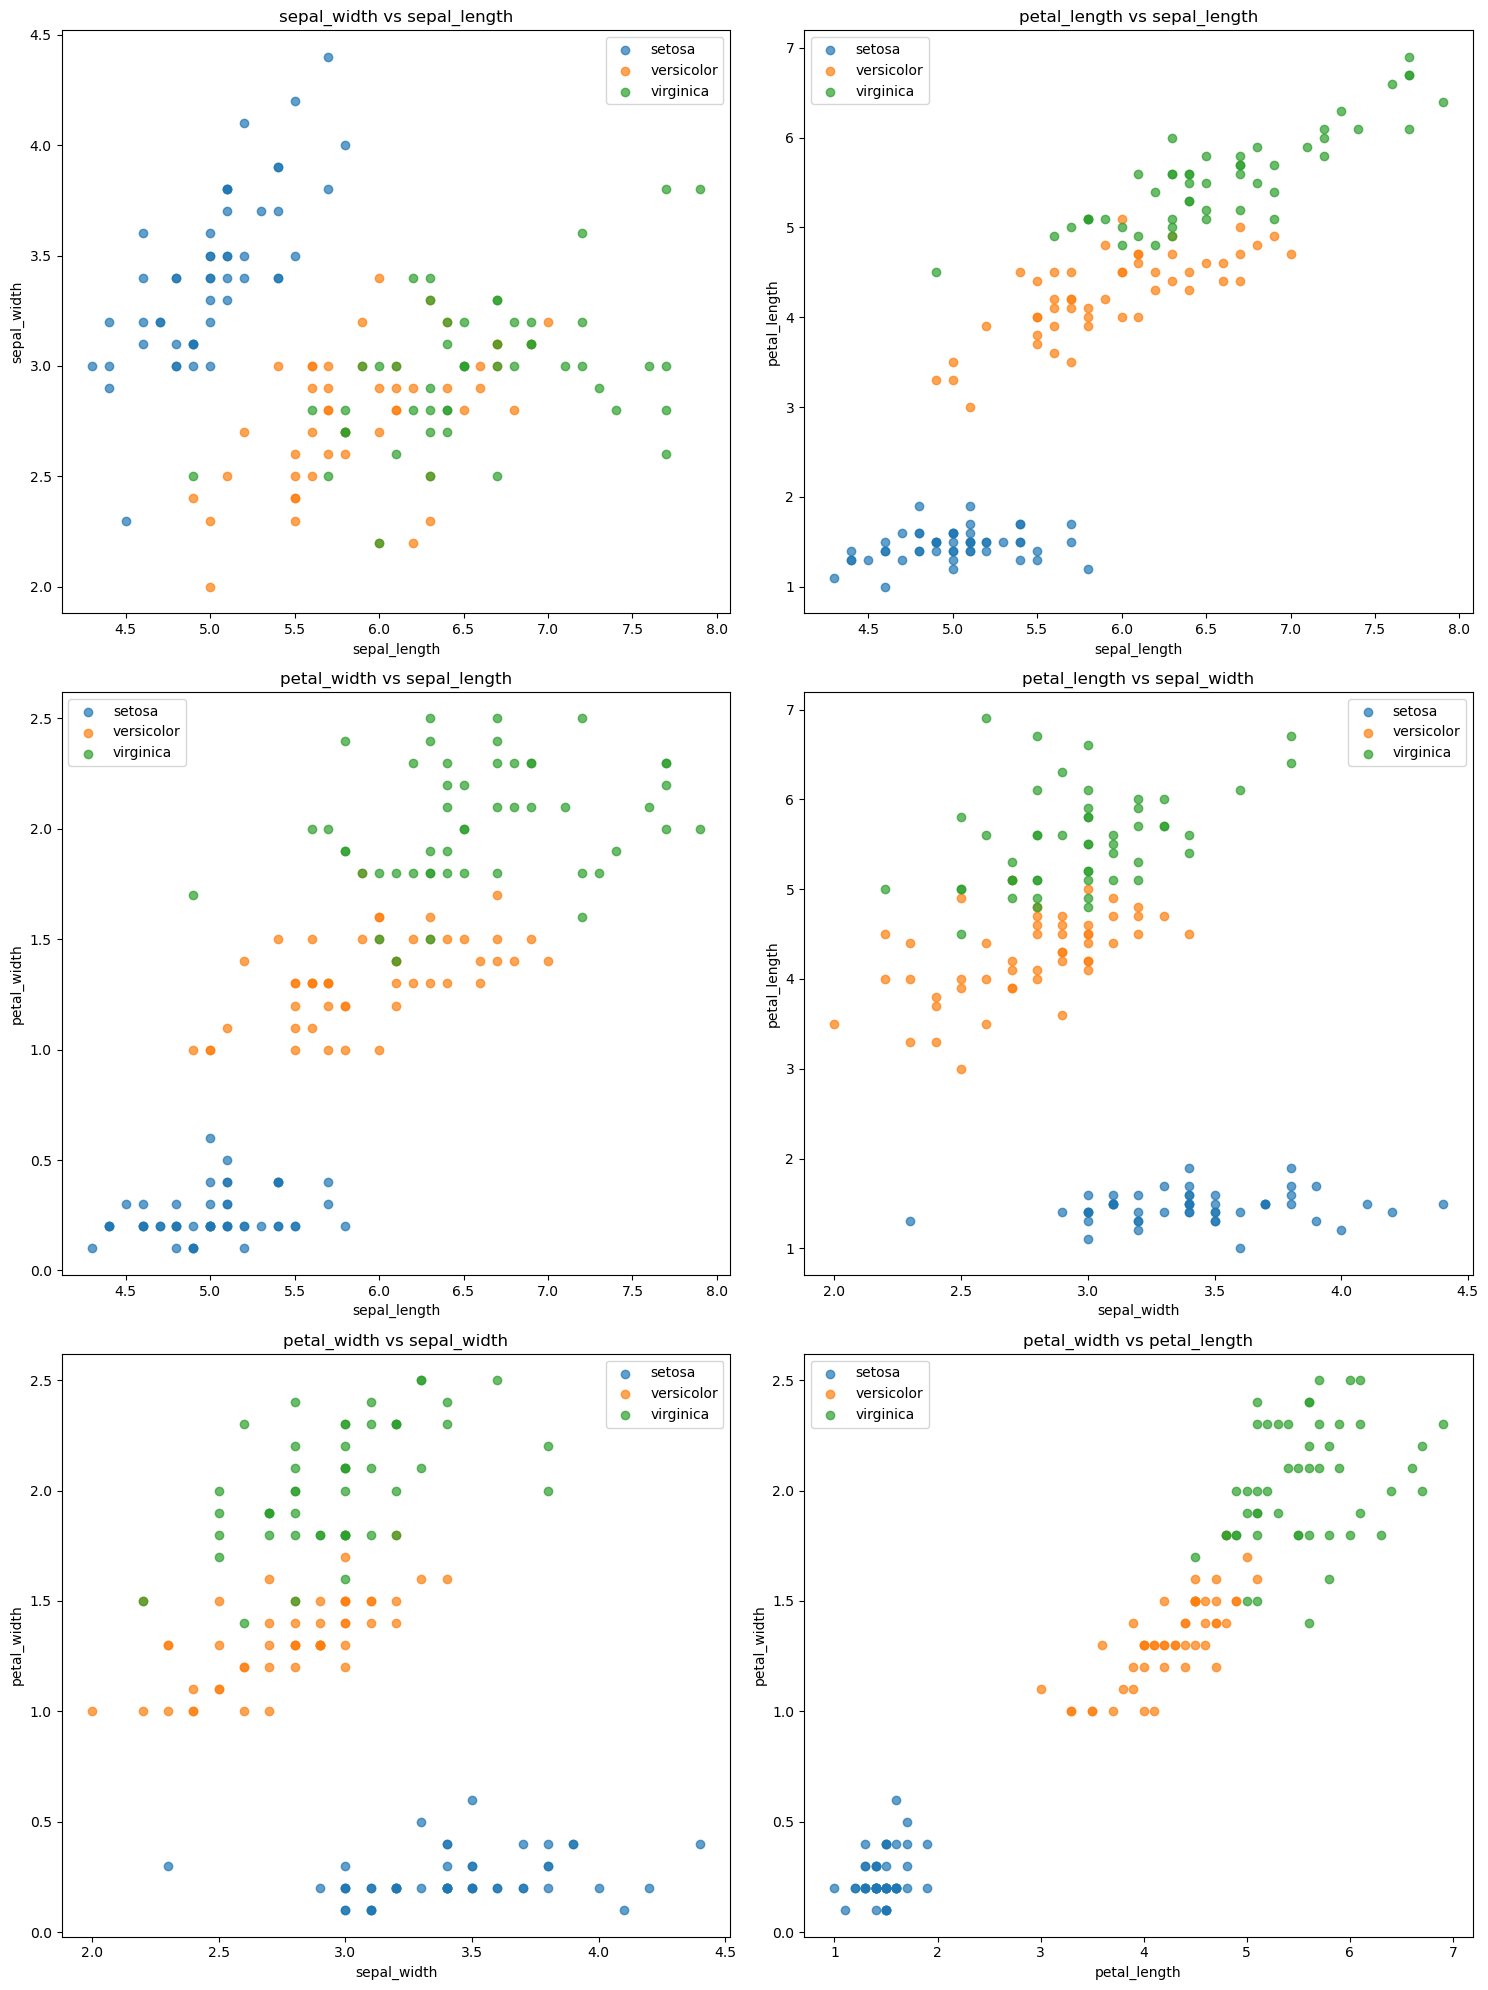

In [19]:
# Get the species names 
features = iris_dataset.columns[:-1]
# print(features)

# Set up the subplot grid
fig, axes = plt.subplots(3, 2, figsize=(15, 20))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Counter for subplot index
plot_index = 0

# Create scatter plots for each pair of features
for i in range(len(features)):
    for j in range(i+1, len(features)):
        for species in iris_dataset['species'].unique():
            subset = iris_dataset[iris_dataset['species'] == species]
            axes[plot_index].scatter(subset[features[i]], subset[features[j]], label=species, alpha=0.7)
        
        axes[plot_index].set_xlabel(features[i])
        axes[plot_index].set_ylabel(features[j])
        axes[plot_index].legend()
        axes[plot_index].set_title(f'{features[j]} vs {features[i]}')
        
        plot_index += 1

plt.tight_layout()
plt.show()

## 3D Scatter plot

https://plot.ly/pandas/3d-scatter-plots/

Needs a lot to mouse interaction to interpret data.

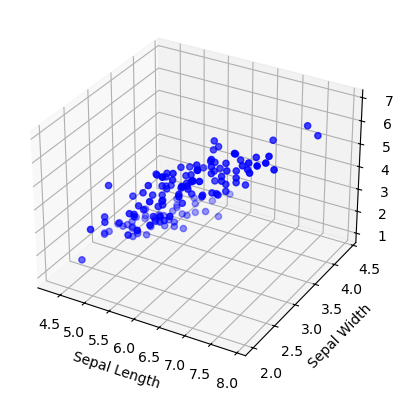

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with data from the DataFrame
ax.scatter(iris_dataset['sepal_length'], iris_dataset['sepal_width'], iris_dataset['petal_length'], 
           c='blue', marker='o')

# Set labels for each axis
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')

plt.show()

In [22]:
#  (2.3) Pair-plot

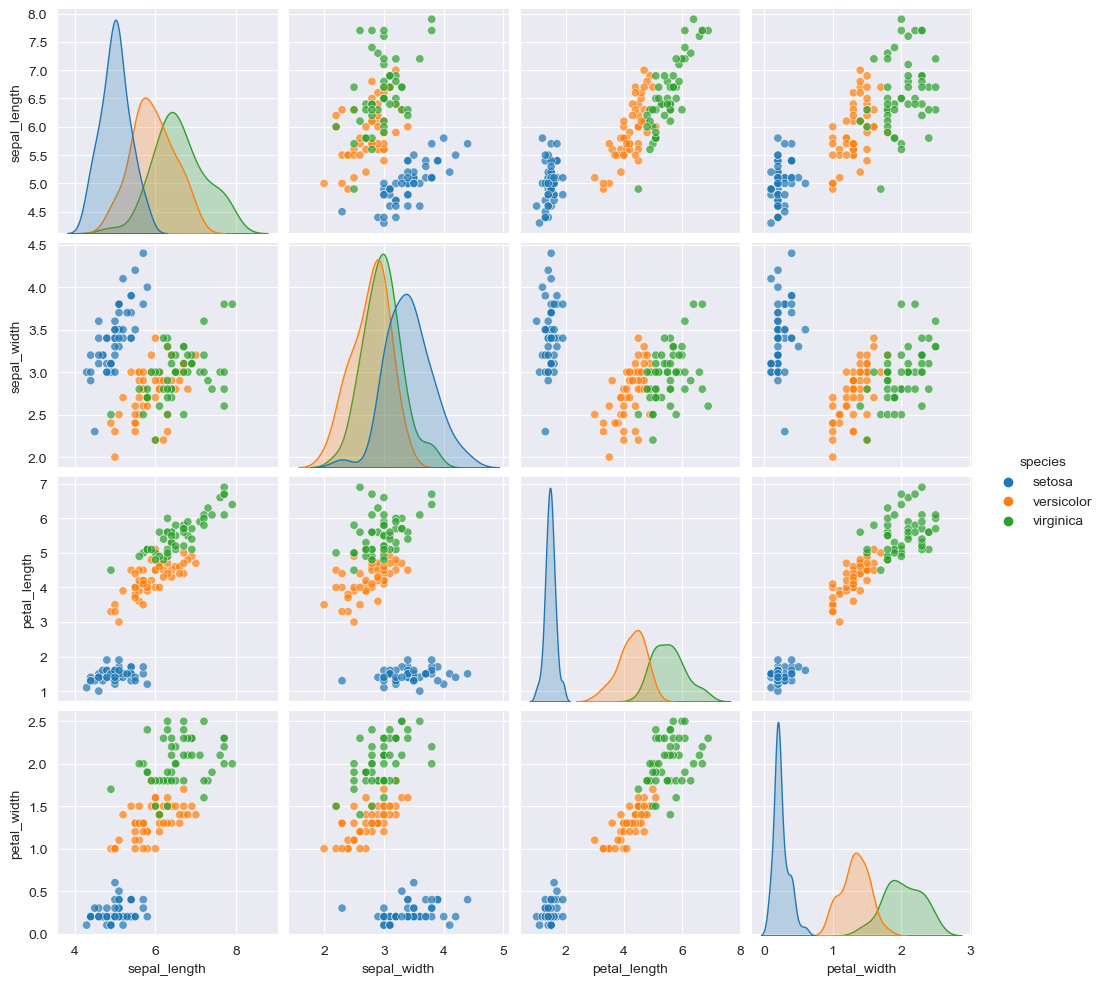

In [23]:
sns.set_style("darkgrid")
sns.pairplot(data=iris_dataset,hue="species", plot_kws={'alpha':0.7})
plt.show()

In [24]:
### pairwise scatter plot: Pair-Plot
### Dis-advantages:
###Can be used when number of features are high.
###Cannot visualize higher dimensional patterns in 3-D and 4-D.
###Only possible to view 2D patterns.

### NOTE: the diagnol elements are PDFs for each feature. PDFs are expalined below.